# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**.

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [15]:
data = pd.read_csv('cost_revenue_dirty.csv')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [16]:
print(data.shape)
print(data.isna().values.any())
print(data.duplicated().values.any())
for name in data.columns:
  print(name)
  print(type(data[name][0]))

(5391, 6)
False
False
Rank
<class 'numpy.int64'>
Release_Date
<class 'str'>
Movie_Title
<class 'str'>
USD_Production_Budget
<class 'str'>
USD_Worldwide_Gross
<class 'str'>
USD_Domestic_Gross
<class 'str'>


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`.
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [17]:
def remove_and_convert(x):
  x = x.replace(",", "")
  x = x.replace("$", "")
  return int(x)

data["USD_Production_Budget"] = data["USD_Production_Budget"].apply(remove_and_convert)
data["USD_Worldwide_Gross"] = data["USD_Worldwide_Gross"].apply(remove_and_convert)
data["USD_Domestic_Gross"] = data["USD_Domestic_Gross"].apply(remove_and_convert)


In [18]:
for name in data.columns:
  print(name)
  print(type(data[name][0]))

Rank
<class 'numpy.int64'>
Release_Date
<class 'str'>
Movie_Title
<class 'str'>
USD_Production_Budget
<class 'numpy.int64'>
USD_Worldwide_Gross
<class 'numpy.int64'>
USD_Domestic_Gross
<class 'numpy.int64'>


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type.

In [19]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])

In [20]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


### Descriptive Statistics

**Challenge**:

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [21]:
data.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00",5391,"5,391.00","5,391.00","5,391.00"
mean,"2,696.00",2003-09-19 15:02:02.203672704,"31,113,737.58","88,855,421.96","41,235,519.44"
min,1.00,1915-08-02 00:00:00,"1,100.00",0.00,0.00
25%,"1,348.50",1999-12-02 12:00:00,"5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00",2006-06-23 00:00:00,"17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50",2011-11-23 00:00:00,"40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00",2020-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00"
std,"1,556.39",NaN,"40,523,796.88","168,457,757.00","66,029,346.27"


In [24]:
maxid = data.USD_Production_Budget.idxmax()
minid = data.USD_Production_Budget.idxmin()
print(data["USD_Worldwide_Gross"].loc[maxid])
print(data.USD_Worldwide_Gross.loc[minid])

2783918982
181041


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [29]:
len(data[data["USD_Domestic_Gross"]==0])
idmax = data[data["USD_Domestic_Gross"]==0]["USD_Production_Budget"].idxmax()
data.loc[idmax]

Rank                                      96
Release_Date             2020-12-31 00:00:00
Movie_Title                      Singularity
USD_Production_Budget              175000000
USD_Worldwide_Gross                        0
USD_Domestic_Gross                         0
Name: 5388, dtype: object

**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [31]:
print(len(data[data["USD_Worldwide_Gross"]==0]))
idmax = data[data["USD_Worldwide_Gross"]==0]["USD_Production_Budget"].idxmax()
data.loc[idmax]

357


Rank                                      96
Release_Date             2020-12-31 00:00:00
Movie_Title                      Singularity
USD_Production_Budget              175000000
USD_Worldwide_Gross                        0
USD_Domestic_Gross                         0
Name: 5388, dtype: object

### Filtering on Multiple Conditions

In [32]:
international_releases = data.loc[(data.USD_Domestic_Gross == 0) &
                                  (data.USD_Worldwide_Gross != 0)]
international_releases

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States.

Hint: This time you'll have to use the `and` keyword.

In [37]:
international = data.query("USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0")
international

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office?
* Create another DataFrame called data_clean that does not include these films.

In [38]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [41]:
# Not yet released
not_yet = data[data['Release_Date'] >= scrape_date]
print(len(not_yet))

7


In [42]:
df_clean = data.drop(not_yet.index)

### Films that Lost Money

**Challenge**:
What is the percentage of films where the production costs exceeded the worldwide gross revenue?

In [45]:
lost_money = df_clean.query("USD_Production_Budget > USD_Worldwide_Gross")
percentage = len(lost_money)/len(df_clean)
print(percentage)

0.37277117384843983


# Seaborn for Data Viz: Bubble Charts

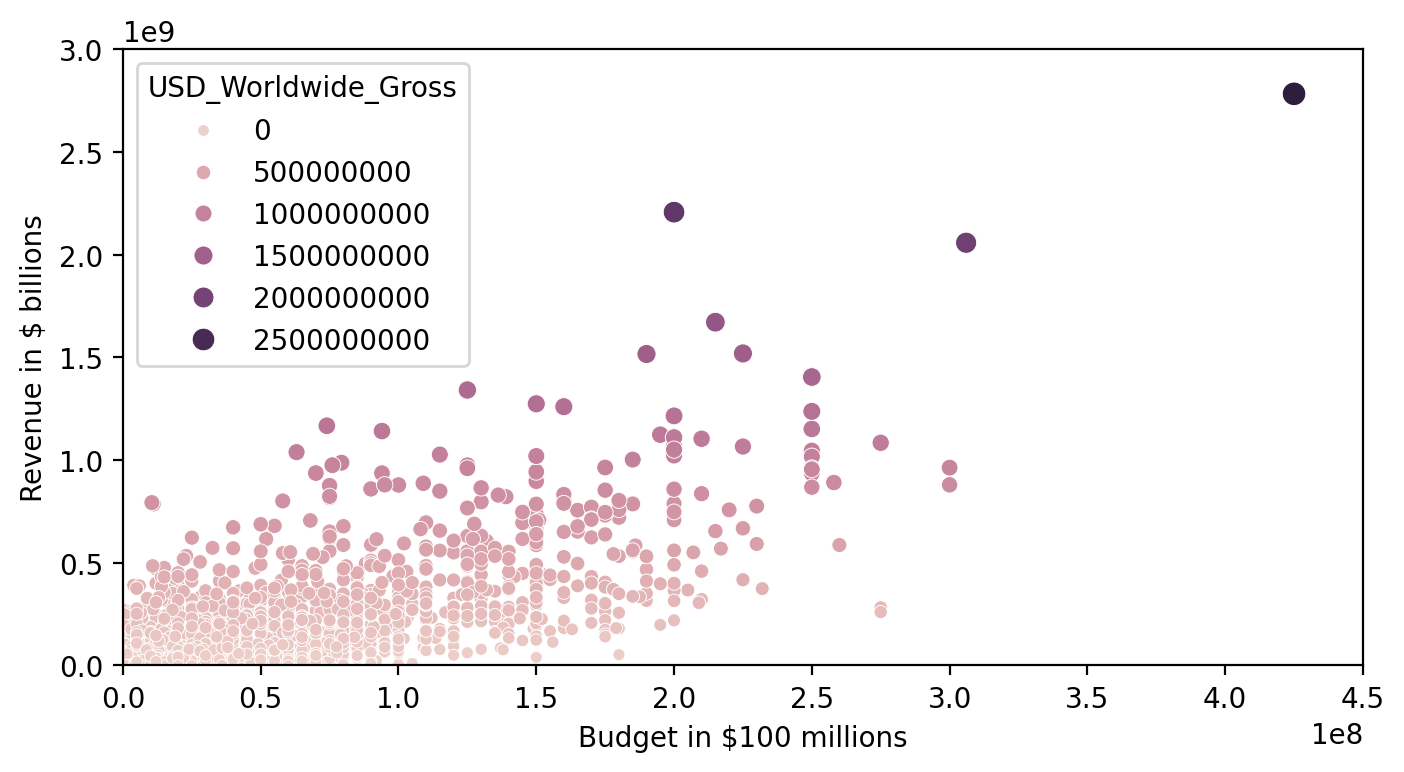

In [51]:
plt.figure(figsize=(8,4), dpi=200)
# return axes.Axes
# seaborn makes it easy for changing hue and size
ax = sns.scatterplot(data=df_clean,
                x='USD_Production_Budget',
                y='USD_Worldwide_Gross',
                hue='USD_Worldwide_Gross',
                size='USD_Worldwide_Gross')
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')
plt.show()

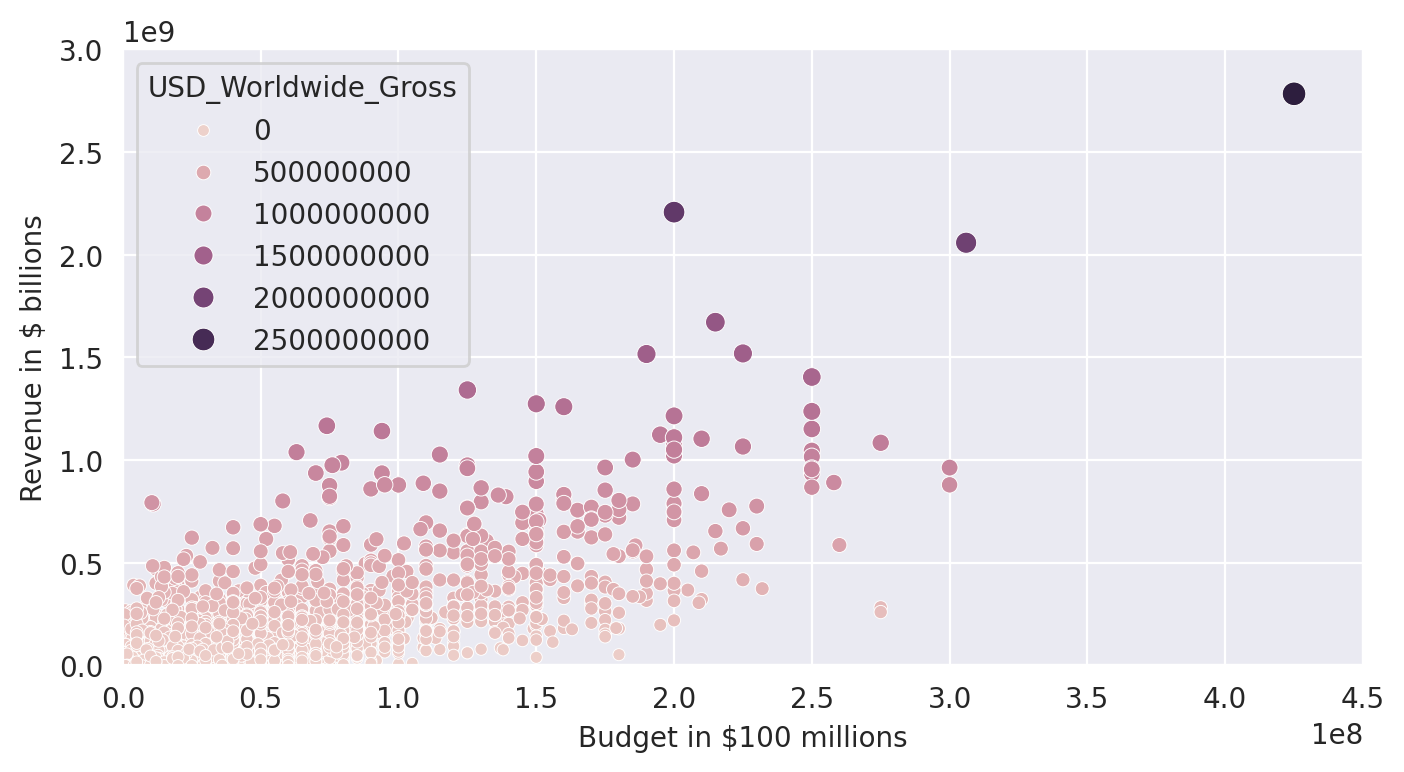

In [52]:
plt.figure(figsize=(8,4), dpi=200)
# To set the styling on a single chart (as opposed to all the charts in the entire notebook)
# we can use Python's with keyword
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=df_clean,
                       x='USD_Production_Budget',
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')

  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



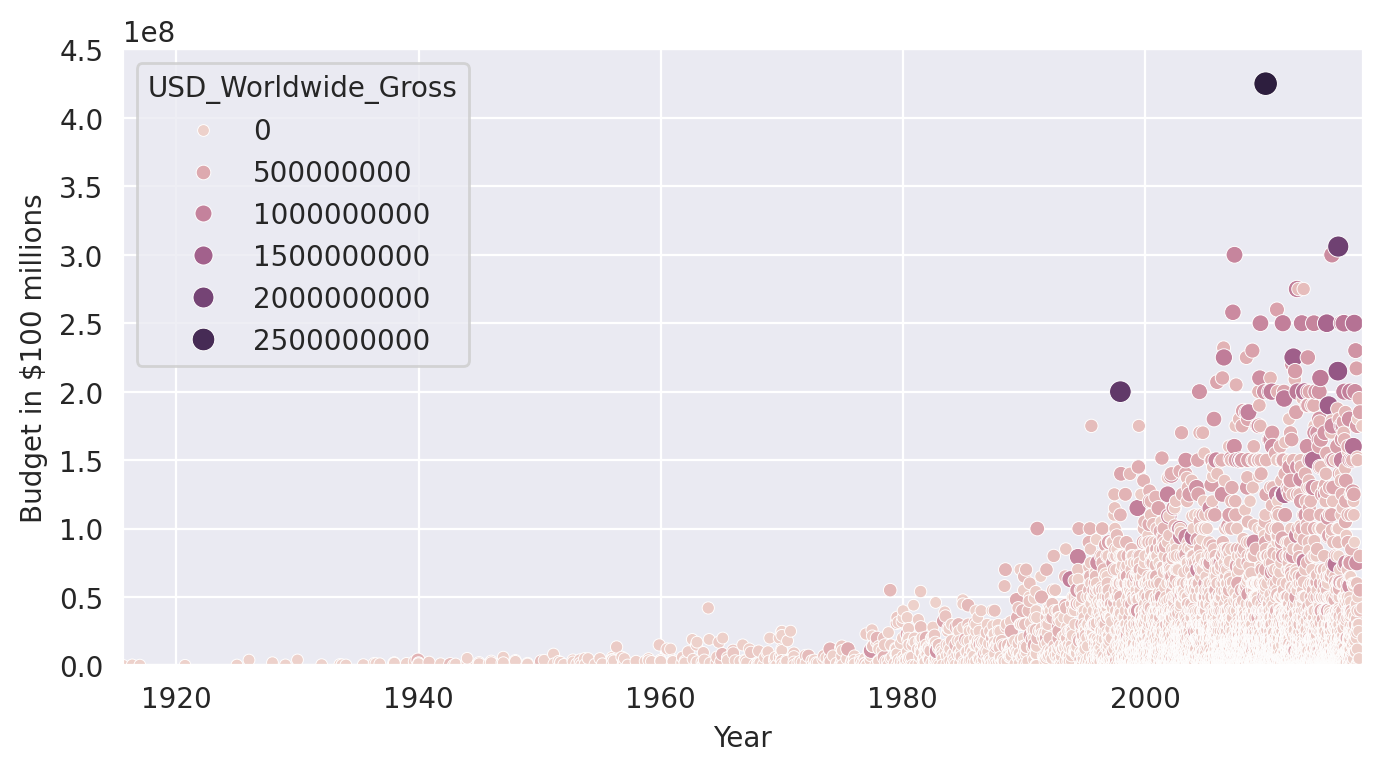

In [58]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=df_clean,
                       x='Release_Date',
                       y='USD_Production_Budget',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')

  ax.set(ylim=(0, 450000000),
        xlim=(df_clean.Release_Date.min(), df_clean.Release_Date.max()),
        xlabel='Year',
        ylabel='Budget in $100 millions')
  # on the graph we saw, after 1970-1980, the budget started to grow, and the industry has produced
  # a lot more films.

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release.

<img src=https://i.imgur.com/0VEfagw.png width=650>

Here's how:
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column.
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [60]:
Decade = pd.DatetimeIndex(df_clean['Release_Date'])
years = Decade.year
decades = (years//10)*10
df_clean["Decade"]=decades

In [61]:
df_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [62]:
old_films = df_clean[df_clean["Decade"]<1970]
new_films = df_clean[df_clean["Decade"]>=1970]


In [63]:
print(len(old_films))
print(len(new_films))


153
5231


In [65]:
id = old_films["USD_Production_Budget"].idxmax()
old_films.loc[id]

Rank                                    1253
Release_Date             1963-12-06 00:00:00
Movie_Title                        Cleopatra
USD_Production_Budget               42000000
USD_Worldwide_Gross                 71000000
USD_Domestic_Gross                  57000000
Decade                                  1960
Name: 109, dtype: object

# Seaborn Regression Plots

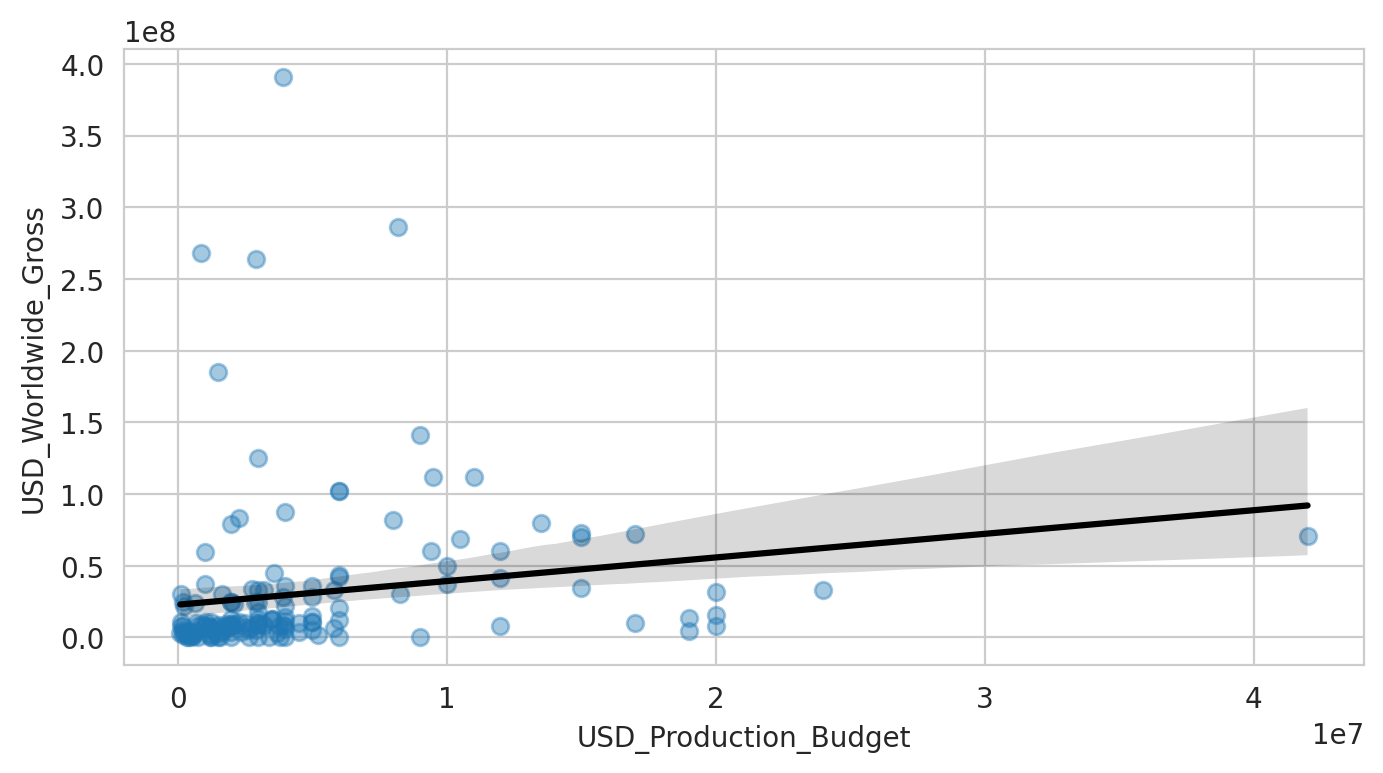

In [67]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films,
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})
# the relationship between the budget and the revenue is not too string

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`.
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

In [69]:
new_films['USD_Worldwide_Gross'].max()

2783918982

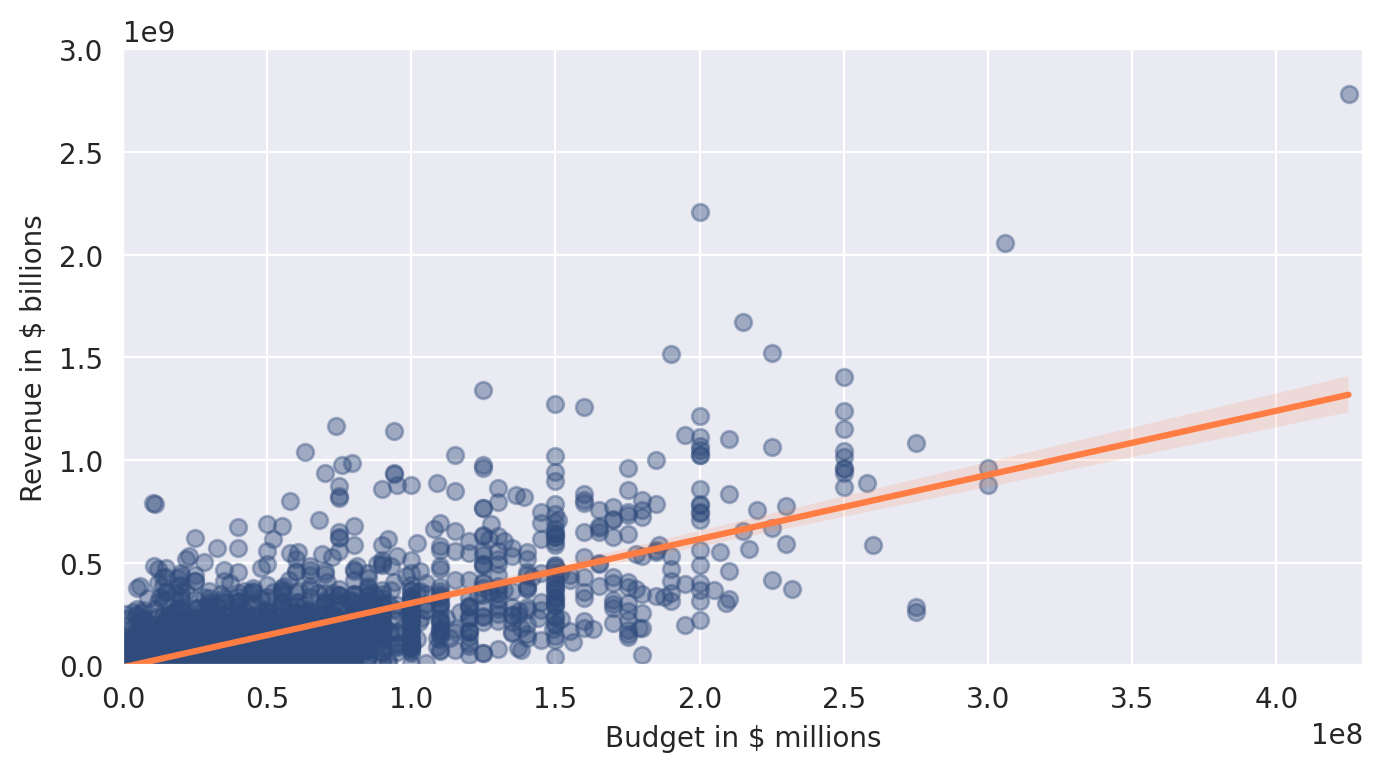

In [73]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
  ax = sns.regplot(data=new_films,
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': '#ff7c43'},
            color ="#2f4b7c")
  ax.set( xlim=(0, 430000000),
            ylim=(0, 3000000000),
        xlabel='Budget in $ millions',
        ylabel='Revenue in $ billions')
# The new films align better then the regression line

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [75]:
regression = LinearRegression()

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [77]:
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])

In [78]:
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million?

In [81]:
regression.fit(X, y)
print(regression.intercept_) # estamated if you have 0 budget, the revenue is negative
print(regression.coef_) # every extra $1 in budget, revenue increase by $3.1

[-8650768.00661027]
[[3.12259592]]


In [82]:
regression.score(X, y)

0.5577032617720403

In [83]:
X1 = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
y1 = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])
regression.fit(X1, y1)
print(regression.intercept_) # estamated if you have 0 budget, the revenue is negative
print(regression.coef_) # every extra $1 in budget, revenue increase by $3.1

print(regression.score(X1,y1))

[22821538.63508039]
[[1.64771314]]
0.02937258620576877


In [84]:
# Make a prediction for a movie revenue with 350 million budget
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 film is around $600000000.0.
